# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

ML is one of the most effective ways to predict accuracy with various evaluation techniques.

### 2. Formulate the business problem, success metrics, and desired ML output.

Main goal of ML is defining the target variable.

### 3. Identify the type of ML problem you’re dealing with.

size of data might be a problem for evaluation

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [2]:
import os
!pip install pathlib2
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
from sklearn.model_selection import train_test_split


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [26]:
# download the files

# <note: make them all relative, absolute path is not accepted>
import os
import zipfile 

!cd 
zip_path = r'data_compressed.zip'
base_path = r'DSTF/'
csv_base_path = r'data_compressed/'

!mkdir  csv_base_path

 
with zipfile.ZipFile(r'data_compressed.zip',mode='r')as zip_ref:
    zip_ref.extractall(r'')

C:\Users\anuma\Videos\DSTF


A subdirectory or file csv_base_path already exists.


In [28]:
# How many zip files do we have? write a code to answer it.
import os.path
all_files = os.listdir(csv_base_path)    
zip_files = list(filter(lambda f: f.endswith('.zip'), all_files))
len(zip_files)


60

#### Extract CSV files from ZIP files

In [29]:


def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with zipfile.ZipFile(zipFile_name, mode='r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')
        
zip2csv(zip_path, base_path)
zip_files=os.listdir(csv_base_path )
for file in zip_files:
    zip2csv(csv_base_path+file, csv_base_path)

print("Files Extracted")

Extracting data_compressed.zip 
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv
zip2csv failed for data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv
zi

Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_4.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_5.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_6.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_7.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_8.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_9.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_10.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_11.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_12.zip 
Extracting data_c

In [30]:
# How many csv files have we extracted? write a code to answer it.
all_files = os.listdir(csv_base_path)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
len(csv_files)

# lambda returns True if filename (within `all_files`) ends with .csv or else False
# and filter function uses the returned boolean value to filter .csv files from list files.

60

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [31]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [32]:
import pandas as pd
df_temp = pd.read_csv(r'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

**Question**: Print the row and column length in the dataset, and print the column names.

In [33]:
df_shape = df_temp
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is         Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2018        3      9           3          1  2018-09-03   
1       2018        3      9           9          7  2018-09-09   
2       2018        3      9          10          1  2018-09-10   
3       2018        3      9          13          4  2018-09-13   
4       2018        3      9          14          5  2018-09-14   
...      ...      ...    ...         ...        ...         ...   
585744  2018        3      9          11          2  2018-09-11   
585745  2018        3      9          11          2  2018-09-11   
585746  2018        3      9          11          2  2018-09-11   
585747  2018        3      9          11          2  2018-09-11   
585748  2018        3      9          11          2  2018-09-11   

       Reporting_Airline  DOT_ID_Reporting_Airline  \
0                     9E                     20363   
1                     9E                     20363 

**Question**: Print the first 10 rows of the dataset.  

In [34]:
# Enter your code here
result = df_temp.head(10)
print("First 10 rows of the DataFrame:")
print(result)

First 10 rows of the DataFrame:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0          

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [35]:
print(f'The column names are :')
for col in df_temp.columns:
    print(col)

The column names are :
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [36]:
del_cols = [col for col in df_temp.columns if 'del' in col]
print(list(df_temp.columns))
print(del_cols)

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [37]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0] , " and ",df_temp.shape[1])
print("The years in this dataset are: ",list(df_temp.Year.unique()))
print("The months covered in this dataset are: ", sorted(list(df_temp.Month.unique())))
print("The date range for data is :" , min(df_temp.FlightDate), " to ", max(df_temp.FlightDate))
print("The airlines covered in this dataset are: ", list(df_temp.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(df_temp.Origin.unique()))
print("The Destination airports covered are: ", list(df_temp.Dest.unique()))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [38]:
counts = pd.DataFrame({'Origin':df_temp.Origin.value_counts(), 'Destination':df_temp.Dest.value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [39]:
counts.sort_values(by=["Origin","Destination"],ascending=False).head(15 )

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [40]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()
    # Reading csv files into a dataframe
    for files in csv_files:
        df = df.append(pd.read_csv(files))
        #Filtering columns of dataframe
        df = df[filter_cols]
        #Subsetting Rows
        for cols, vals in zip(subset_cols,subset_vals):
            df = df[df[cols].isin(vals)]
        print(df)
    df.to_csv(file_name)
    

In [45]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [46]:
import time
import glob
import pandas as pd
start = time.time()
# Read all the files with extension .csv
csv_files = glob.glob('data_compressed/*.{}'.format('csv'))
combined_csv_filename = f"combined_files.csv"

files_combined= combine_csv(csv_files,cols,subset_cols,subset_vals,combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')



        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
471840  2014        1      1          27          1  2014-01-27   
471841  2014        1      1          28          2  2014-01-28   
471842  2014        1      1          29          3  2014-01-29   
471843  2014        1      1          30          4  2014-01-30   
471844  2014        1      1          31          5  2014-01-31   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
444124  2014        4     12          26          5  2014-12-26   
444129  2014        4     12          26          5  2014-12-26   
444130  2014        4     12          26          5  2014-12-26   
444181  2014        4     12          26          5  2014-12-26   
444182  2014        4     12          26          5  2014-12-26   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
448326  2014        2      4          30          3  2014-04-30   
448327  2014        2      4          30          3  2014-04-30   
448338  2014        2      4          30          3  2014-04-30   
448339  2014        2      4          30          3  2014-04-30   
448348  2014        2      4          30          3  2014-04-30   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
507259  2014        3      7           5          6  2014-07-05   
507260  2014        3      7          19          6  2014-07-19   
507261  2014        3      7          12          6  2014-07-12   
507262  2014        3      7          29          2  2014-07-29   
507263  2014        3      7           3          4  2014-07-03   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
422955  2015        1      1          30          5  2015-01-30   
422962  2015        1      1          30          5  2015-01-30   
422975  2015        1      1          30          5  2015-01-30   
423009  2015        1      1          30          5  2015-01-30   
423023  2015        1      1          30          5  2015-01-30   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
479160  2015        4     12          25          5  2015-12-25   
479186  2015        4     12          25          5  2015-12-25   
479188  2015        4     12          25          5  2015-12-25   
479200  2015        4     12          25          5  2015-12-25   
479222  2015        4     12          25          5  2015-12-25   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
457020  2015        2      4          30          4  2015-04-30   
457021  2015        2      4          30          4  2015-04-30   
457056  2015        2      4          30          4  2015-04-30   
457082  2015        2      4          30          4  2015-04-30   
457083  2015        2      4          30          4  2015-04-30   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
520583  2015        3      7          31          5  2015-07-31   
520584  2015        3      7          31          5  2015-07-31   
520585  2015        3      7          31          5  2015-07-31   
520586  2015        3      7          31          5  2015-07-31   
520587  2015        3      7          31          5  2015-07-31   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
424119  2016        1      1          13          3  2016-01-13   
424124  2016        1      1          13          3  2016-01-13   
424128  2016        1      1          13          3  2016-01-13   
424129  2016        1      1          13          3  2016-01-13   
424232  2016        1      1          13          3  2016-01-13   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
460794  2016        4     12          30          5  2016-12-30   
460805  2016        4     12          30          5  2016-12-30   
460878  2016        4     12          30          5  2016-12-30   
460884  2016        4     12          30          5  2016-12-30   
460885  2016        4     12          30          5  2016-12-30   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
461050  2016        2      4           1          5  2016-04-01   
461053  2016        2      4           1          5  2016-04-01   
461060  2016        2      4           1          5  2016-04-01   
461063  2016        2      4           1          5  2016-04-01   
461069  2016        2      4           1          5  2016-04-01   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
499061  2016        3      7          22          5  2016-07-22   
499101  2016        3      7          22          5  2016-07-22   
499102  2016        3      7          22          5  2016-07-22   
499115  2016        3      7          22          5  2016-07-22   
499116  2016        3      7          22          5  2016-07-22   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
449702  2017        1      1          29          7  2017-01-29   
449703  2017        1      1          29          7  2017-01-29   
449704  2017        1      1          29          7  2017-01-29   
449705  2017        1      1          29          7  2017-01-29   
449706  2017        1      1          29          7  2017-01-29   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
464188  2017        4     12          17          7  2017-12-17   
464189  2017        4     12          17          7  2017-12-17   
464194  2017        4     12          17          7  2017-12-17   
464197  2017        4     12          17          7  2017-12-17   
464201  2017        4     12          17          7  2017-12-17   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
436585  2017        2      4          17          1  2017-04-17   
436596  2017        2      4          17          1  2017-04-17   
436624  2017        2      4          17          1  2017-04-17   
436626  2017        2      4          17          1  2017-04-17   
436660  2017        2      4          17          1  2017-04-17   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
509035  2017        3      7           1          6  2017-07-01   
509036  2017        3      7           1          6  2017-07-01   
509037  2017        3      7           1          6  2017-07-01   
509060  2017        3      7           1          6  2017-07-01   
509061  2017        3      7           1          6  2017-07-01   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
570006  2018        1      1          11          4  2018-01-11   
570016  2018        1      1          11          4  2018-01-11   
570044  2018        1      1          11          4  2018-01-11   
570086  2018        1      1          11          4  2018-01-11   
570090  2018        1      1          11          4  2018-01-11   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
593767  2018        4     12          27          4  2018-12-27   
593768  2018        4     12          27          4  2018-12-27   
593790  2018        4     12          27          4  2018-12-27   
593810  2018        4     12          27          4  2018-12-27   
593811  2018        4     12          27          4  2018-12-27   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
596003  2018        2      4          14          6  2018-04-14   
596019  2018        2      4          14          6  2018-04-14   
596020  2018        2      4          14          6  2018-04-14   
596036  2018        2      4          14          6  2018-04-14   
596038  2018        2      4          14          6  2018-04-14   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086    2014        1      1          26          7  2014-01-26   
1097    2014        1      1          26          7  2014-01-26   
1114    2014        1      1          26          7  2014-01-26   
1122    2014        1      1          26          7  2014-01-26   
1126    2014        1      1          26          7  2014-01-26   
...      ...      ...    ...         ...        ...         ...   
645200  2018        3      7          25          3  2018-07-25   
645236  2018        3      7          25          3  2018-07-25   
645238  2018        3      7          25          3  2018-07-25   
645282  2018        3      7          25          3  2018-07-25   
645293  2018        3      7          25          3  2018-07-25   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                  DL    ATL          GA  IAH        TX        2145   
1097                  DL    DFW          TX  AT

csv's merged in 13.51 minutes


#### Load dataset

Load the combined dataset.

In [47]:
import pandas as pd
data = pd.read_csv(r"combined_files.csv")# Enter your code here to read the combined csv file.


Print the first 5 records.

In [48]:
first_5_records = data.head(5)
print(first_5_records)

   Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0        1086  2014        1      1          26          7  2014-01-26   
1        1097  2014        1      1          26          7  2014-01-26   
2        1114  2014        1      1          26          7  2014-01-26   
3        1122  2014        1      1          26          7  2014-01-26   
4        1126  2014        1      1          26          7  2014-01-26   

  Reporting_Airline Origin OriginState  ... DestState CRSDepTime  Cancelled  \
0                DL    ATL          GA  ...        TX       2145        0.0   
1                DL    DFW          TX  ...        GA        945        0.0   
2                DL    ATL          GA  ...        CO       1855        0.0   
3                DL    ATL          GA  ...        AZ       1634        0.0   
4                DL    PHX          AZ  ...        GA        700        0.0   

   Diverted  Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  \
0  

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [49]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ",data.shape[1])
print("The years in this dataset are: ",list(data.Year.unique()))
print("The months covered in this dataset are: ", sorted(list(data.Month.unique())))
print("The date range for data is :" , min(data.FlightDate), " to ", max(data.FlightDate))
print("The airlines covered in this dataset are: ", list(data.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(data.Origin.unique()))
print("The Destination airports covered are: ", list(data.Dest.unique()))

The #rows and #columns are  1658130  and  21
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [50]:
data.rename(columns={'ArrDel15':"is_delay"}, inplace=True) # Enter your code here


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [51]:
data.isnull().sum()

Unnamed: 0               0
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [52]:
### Remove null columns
#data = # Enter your code here
data.dropna(how='any', axis=0, inplace=True)

Get the hour of the day in 24-hour time format from CRSDepTime.

In [53]:
x =(data['CRSDepTime']/100).astype(str)
data['DepHourofDay'] =pd.to_datetime(x,format='%H.%M').dt.time
data['DepHourofDay'] 

0          21:45:00
1          09:45:00
2          18:55:00
3          16:34:00
4          07:00:00
             ...   
1658125    11:05:00
1658126    08:25:00
1658127    12:04:00
1658128    22:01:00
1658129    16:01:00
Name: DepHourofDay, Length: 1635590, dtype: object

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

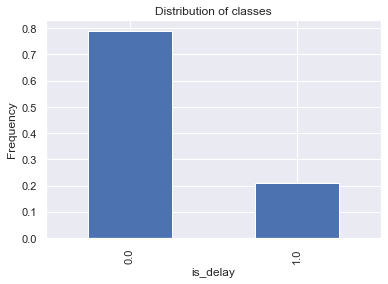

In [54]:
import matplotlib.pyplot as plt
(data.groupby("is_delay").size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

In [ ]:
# Enter your answer here and turn the cell type to markdown

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

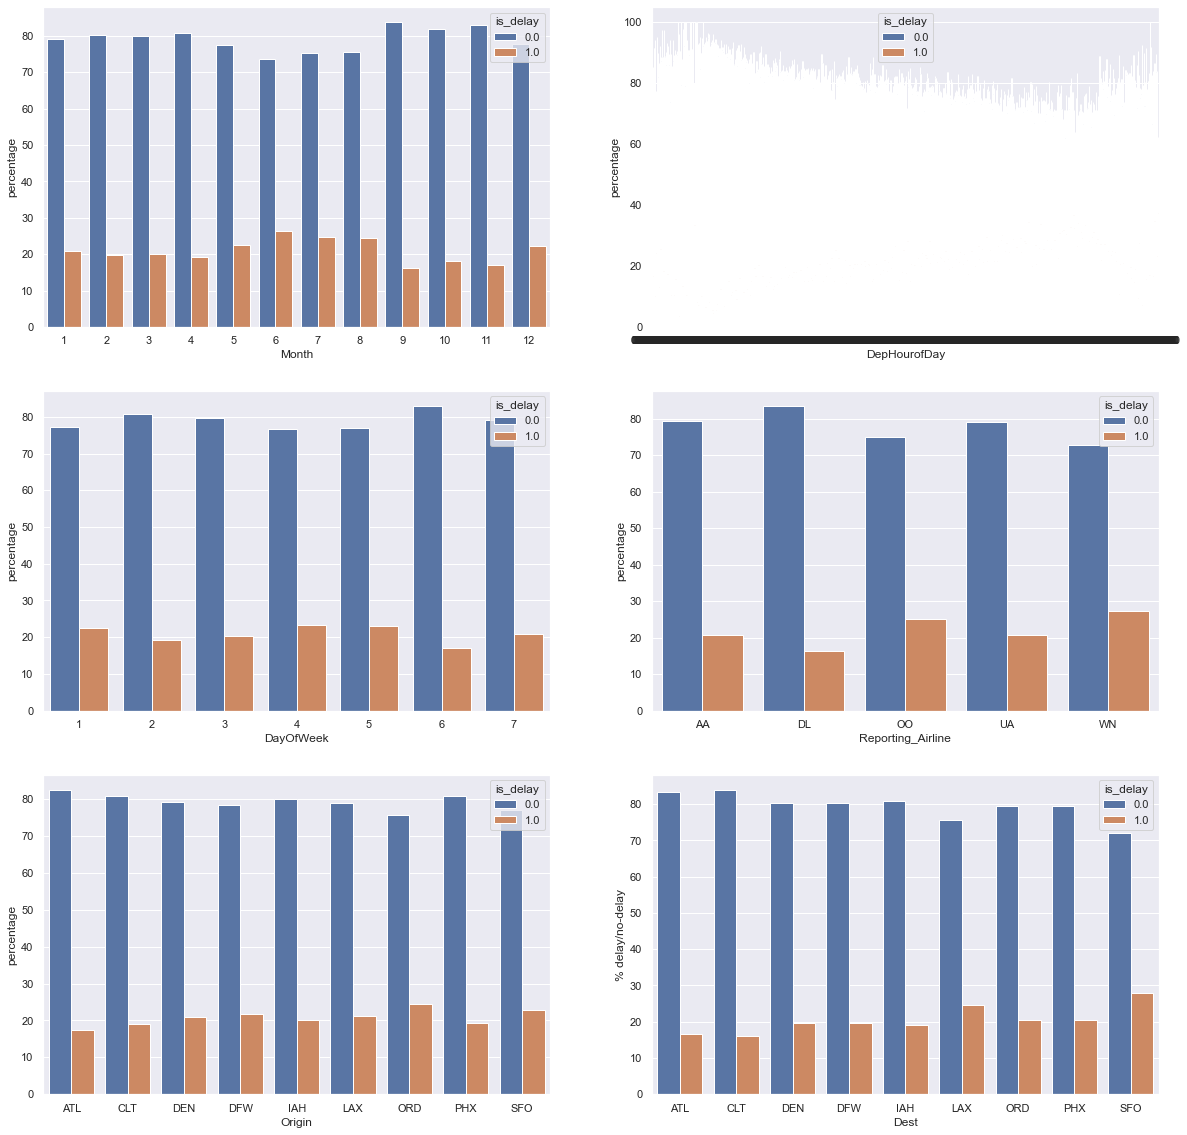

In [55]:
import seaborn as sns
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

In [56]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

June months have the most delays.

Which time of the day has the most delays is not clear from the graph.

1,4 & 5  day of the week has the most delays.

WN airline has the most delays.

ORD origin and SFO destination airports have the most delays.

flight distance is not a factor in the delays.

### Features

Look at all the columns and what their specific types are.

In [57]:
data.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest',
       'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance',
       'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime',
       'DepHourofDay'],
      dtype='object')

In [58]:
data.dtypes

Unnamed: 0             int64
Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay          object
dtype: object

.Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [59]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [60]:
data_dummies = pd.get_dummies(data[categorical_columns[0:7]], drop_first=True) 
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [61]:
data.shape[0]

1635590

In [62]:
count_columns = data.shape[1]  
count_columns
data.columns


Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [63]:
data.rename(columns = {"is_delay":"target"}, inplace=True )


In [64]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
data.to_csv('combined_csv_v1.csv', index=False)
# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [65]:
# write Code here to split data into train, validate and test
X = data.drop(['target'],axis=1)
y = data['target']
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 8)
# Use the same function above for the validation set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
  #  test_size=0.50, random_state= 8)

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1308472, 71) (327118, 71) (1308472,) (327118,)


### Baseline classification model

In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

In [68]:
from sklearn.metrics import classification_report
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258911
         1.0       0.00      0.00      0.00     68207

    accuracy                           0.79    327118
   macro avg       0.40      0.50      0.44    327118
weighted avg       0.63      0.79      0.70    327118



To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def plot_confusion_matrix(test_labels, target_predicted):
    cf_matrix=confusion_matrix(test_labels, target_predicted)
    print(cf_matrix)


    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## 
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
 

In [70]:
from sklearn import metrics
def plot_roc(test_labels, target_predicted):
    #define metrics
    y_pred_proba = logmodel.predict_proba(test_labels)[::,1]
    fpr, tpr, _ = metrics.roc_curve(target_predicted,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [71]:
plot_confusion_matrix(y_test,predictions)  

[[258911      0]
 [ 68207      0]]


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

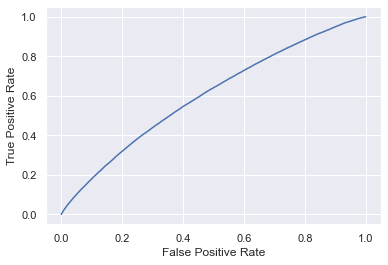

In [72]:
plot_roc(X_test,y_test)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


In [73]:
# Enter your answer here and turn the cell type into markdown

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://gitlab.com/AnuMariaGeorge/airlinedelayprediction

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [75]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18


#Conerting holidays to DataFrame
holidays=pd.DataFrame(holidays)

### Add indicator variable for holidays
data_orig['is_holiday']=np.where((data_orig['FlightDate'].isin(holidays[0])),1,0)


In [76]:
# To check the new boolean column values
data_orig['is_holiday'].unique()

array([0, 1])

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [ ]:
# download data from the link above and place it into the data folder


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [77]:
import pandas as pd
weather = pd.read_csv(r"daily-summaries-2022-11-01T23-34-15.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = {station[i]: airports[i] for i in range(len(station))}
weather['airport'] = [station_map[station_code] for station_code in weather['STATION'] if station_code in station_map.keys()]


Create another column called `MONTH` from the `DATE` column.

In [78]:
weather['MONTH'] = weather["DATE"].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [79]:
weather.SNOW.fillna(weather.SNOW.isna(), inplace=True)
weather.SNWD.fillna(weather.SNOW.isna(), inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [80]:
import numpy as np
idx = np.array([i for i in range(len(weather))])
TAVG_idx =idx[weather['TAVG'].isna ()]
TMAX_idx =idx[weather['TMAX'].isna ()]
TMIN_idx =idx[weather['TMIN'].isna ()]

TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [81]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute

MONTH      STATION        TAVG        TMAX        TMIN
0      01  USW00003017   -2.741935   74.000000  -69.858065
1      01  USW00003927   79.529032  143.767742   20.696774
2      01  USW00012960  110.535484  170.438710   52.425806
3      01  USW00013874   59.070968  114.600000    8.161290
4      01  USW00013881   48.929032  106.529032  -15.645161
..    ...          ...         ...         ...         ...
103    12  USW00013881   87.670968  138.870968   31.625806
104    12  USW00023174  147.922581  195.032258  102.038710
105    12  USW00023183  135.806452  198.206452   78.787097
106    12  USW00023234  115.025806  147.032258   80.361290
107    12  USW00094846   -2.735484   29.522581  -36.703226

[108 rows x 5 columns]

Merge the mean data with the weather data.

In [82]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [83]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [84]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

In [85]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [86]:
sum(data.isna().any())

0

In [87]:
data_orig.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest',
       'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance',
       'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime',
       'DepHourofDay', 'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [88]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek','Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
             'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [89]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) 
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [90]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [93]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [94]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
data.to_csv('combined_csv_v2.csv', index=False)
# note this combined file will be also used in part B

Create the training and testing sets again.

In [95]:
# write Code here to split data into train, validate and test
X = data.drop(['target','DepHourofDay'],axis=1)
y = data['target']
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 8)

In [96]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1308472, 84) (327118, 84) (1308472,) (327118,)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [97]:
# Instantiate another logistic regression model
from sklearn.linear_model import LogisticRegression
classifier2  = LogisticRegression()
classifier2.fit(X_train,y_train)

LogisticRegression()

In [98]:
from sklearn.metrics import classification_report
predictions = classifier2.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258911
         1.0       0.50      0.04      0.07     68207

    accuracy                           0.79    327118
   macro avg       0.65      0.51      0.48    327118
weighted avg       0.73      0.79      0.71    327118



[[256255   2656]
 [ 65560   2647]]


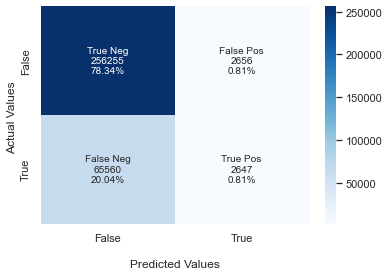

In [99]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def plot_confusion_matrix(test_labels, target_predicted):
    cf_matrix=confusion_matrix(test_labels, target_predicted)
    print(cf_matrix)


    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## 
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
plot_confusion_matrix(y_test,predictions) 

In [100]:
from sklearn import metrics
def plot_roc(test_labels, target_predicted):
    #define metrics
    y_pred_proba = classifier2.predict_proba(test_labels)[::,1]
    fpr, tpr, _ = metrics.roc_curve(target_predicted,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(X_test,y_test)    

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

There is not much difference in result adding extra data, Its almost similar.


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1)The variables with excessively high correlation should be eliminated. Another factor to take into account is the correlation between dataset columns. If all of these variables are taken into account in our study, the performance of our model will precisely satisfy the corporate objective. Additionally, different classification models may be taken into account, and the best model may be used to forecast delays.

2)After performing feature engineering on the dataset, it was discovered that the model performances had somewhat increased. Some of the negative classes could be accurately predicted by the model as well. The process of feature engineering, where additional features were introduced to the dataset, assisted in enhancing the model's functionality.

3)(a) Combining all 60 csv files, then storing the output in the working directory.
b) Combining the original dataset with the weather dataset.
(c) In some instances, the machine overheated because of the size of the data.

4)
Based on certain input data, I discovered that. Machine learning will generate an estimate about a pattern in the data, which may be labelled or unlabeled.

In order to address a wide range of real-world issues, learned machine learning can be used to any aspect of daily life.

Supervised, unsupervised, and reinforcement learning are the several methods of machine learning.

Learn how to work on AWS
